In [144]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [145]:
df = pd.read_csv("./data/data.csv")

In [146]:
df.head()

,fl,fw,gh,il,iw,pchl,pcl,pcw,ph,pil,...,pw,ri,ro,sh,sl,sw,freq,s11,gain,bandwidth
0,1.0,1.0,0.1,0.6,3.5,15.0,1.0,22.0,0.4,14.0,...,35.0,1.0,3.5,3.0,41.0,50.0,4.2778,-21.447149,1.713390,0.073339
1,1.0,1.0,0.1,0.6,3.5,15.0,1.0,22.0,0.4,14.0,...,33.2,1.0,3.5,3.0,41.0,50.0,7.8913,-29.974880,6.672563,NaN
2,1.0,1.0,0.1,0.6,3.5,15.0,1.0,22.0,0.4,14.0,...,31.9,1.0,3.5,3.0,41.0,50.0,6.7825,-29.186930,4.348915,0.203333
3,1.0,1.0,0.1,0.6,3.5,15.0,1.0,22.0,0.4,14.0,...,30.6,1.0,3.5,3.0,41.0,50.0,8.7130,-35.987275,8.515079,1.563093
4,1.0,1.0,0.1,0.6,3.5,15.0,1.0,22.0,0.4,14.0,...,29.3,1.0,3.5,3.0,41.0,50.0,7.3270,-22.439577,6.253887,0.634561


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1297 entries, 0 to 1296
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   fl         1297 non-null   float64
 1   fw         1297 non-null   float64
 2   gh         1297 non-null   float64
 3   il         1297 non-null   float64
 4   iw         1297 non-null   float64
 5   pchl       1297 non-null   float64
 6   pcl        1297 non-null   float64
 7   pcw        1297 non-null   float64
 8   ph         1297 non-null   float64
 9   pil        1297 non-null   float64
 10  piw        1297 non-null   float64
 11  pl         1297 non-null   float64
 12  pw         1297 non-null   float64
 13  ri         1297 non-null   float64
 14  ro         1297 non-null   float64
 15  sh         1297 non-null   float64
 16  sl         1297 non-null   float64
 17  sw         1297 non-null   float64
 18  freq       1297 non-null   float64
 19  s11        1297 non-null   float64
 20  gain    

In [148]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, random_state=22051662)

Split the data before transforming because if the Scaling fucntion is fitted on the entire data, the values of the "future" aka the "test" set will be leaked into the past, discovering time travel which is not possible according to the second law of thermodynamics. For more refer to https://www.kaggle.com/discussions/questions-and-answers/415136#2288446

In [149]:
train.head()

,fl,fw,gh,il,iw,pchl,pcl,pcw,ph,pil,...,pw,ri,ro,sh,sl,sw,freq,s11,gain,bandwidth
594,1.0,1.0,0.1,0.2,3.3,15.0,1.0,22.0,0.4,14.0,...,35.0,1.0,3.2,3.0,41.0,50.0,4.2778,-17.877814,1.143690,0.072541
153,1.0,1.0,0.1,0.2,3.5,15.0,1.0,22.0,0.4,14.0,...,30.6,1.0,3.4,3.0,41.0,50.0,6.9508,-22.937446,5.002405,0.219825
990,1.0,1.0,0.1,0.3,3.1,15.0,1.0,22.0,0.4,14.0,...,35.0,1.0,3.2,3.0,41.0,50.0,4.2778,-18.534137,1.186307,0.072600
548,1.0,1.0,0.1,0.3,3.3,15.0,1.0,22.0,0.4,14.0,...,31.9,1.0,3.4,3.0,41.0,50.0,7.9804,-32.208373,7.730412,1.267329
1026,1.0,1.0,0.1,0.2,3.1,15.0,1.0,22.0,0.4,14.0,...,35.0,1.0,3.2,3.0,41.0,50.0,4.2778,-17.724999,1.201398,0.072254


In [150]:
test.head()

,fl,fw,gh,il,iw,pchl,pcl,pcw,ph,pil,...,pw,ri,ro,sh,sl,sw,freq,s11,gain,bandwidth
0,1.0,1.0,0.1,0.6,3.5,15.0,1.0,22.0,0.4,14.0,...,35.0,1.0,3.5,3.0,41.0,50.0,4.2778,-21.447149,1.713390,0.073339
786,1.0,1.0,0.1,0.3,3.2,15.0,1.0,22.0,0.4,14.0,...,35.0,1.0,3.0,3.0,41.0,50.0,4.2778,-18.653701,1.186150,0.072729
1209,1.0,1.0,0.1,0.3,3.0,15.0,1.0,22.0,0.4,14.0,...,30.6,1.0,3.2,3.0,41.0,50.0,6.9409,-22.490260,4.916251,0.227230
1015,1.0,1.0,0.1,0.2,3.1,15.0,1.0,22.0,0.4,14.0,...,33.2,1.0,3.4,3.0,41.0,50.0,4.4362,-28.640918,2.288885,0.080863
46,1.0,1.0,0.1,0.5,3.5,15.0,1.0,22.0,0.4,14.0,...,29.3,1.0,3.4,3.0,41.0,50.0,8.8417,-22.617382,8.429841,0.624241


In [151]:
xcols = ['il', 'iw', 'pw', 'ro']
ycols = ['freq', 's11', 'gain']

In [152]:
X_train, X_test = train[xcols].values, test[xcols].values
y_train, y_test = train[ycols].values, test[ycols].values

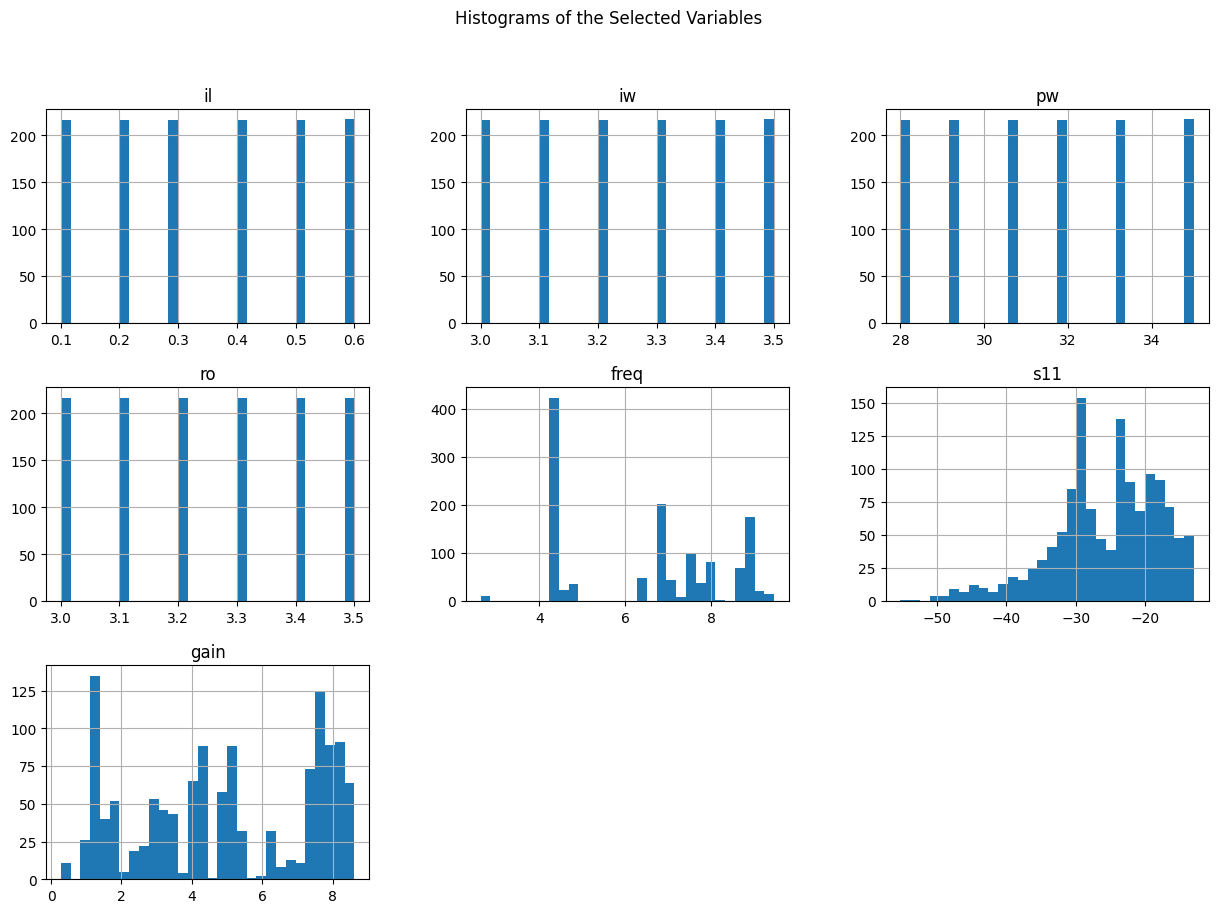

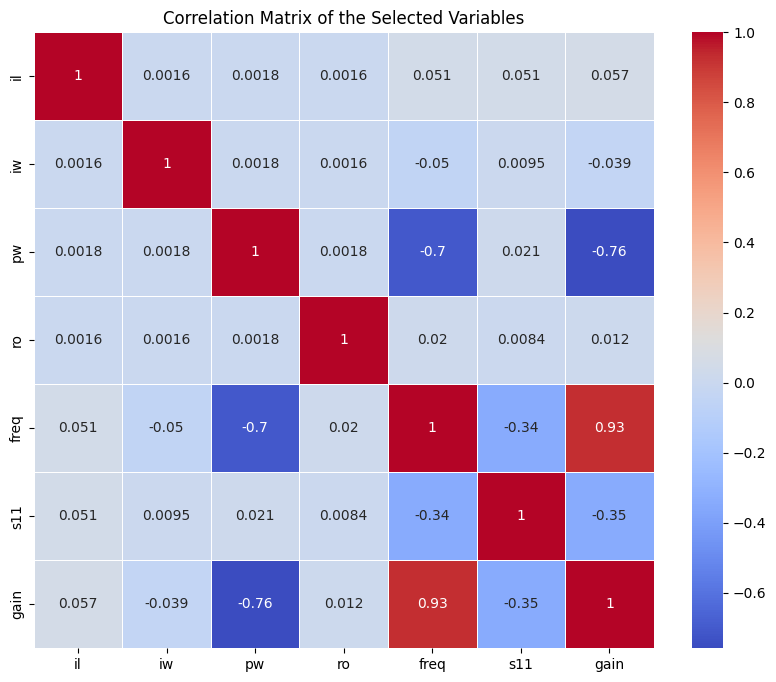

In [188]:
import matplotlib.pyplot as plt
import seaborn as sns

selected_columns = xcols + ycols

df[selected_columns].hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of the Selected Variables')
plt.show()

corr_matrix = df[selected_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of the Selected Variables')
plt.show()


In [154]:
from sklearn.preprocessing import MinMaxScaler

In [155]:
Scaler_X = MinMaxScaler().fit(X_train)
Scaler_Y = MinMaxScaler().fit(y_train)

In [156]:
X_train_scaled = Scaler_X.transform(X_train)
X_test_scaled = Scaler_X.transform(X_test)

y_train_scaled = Scaler_Y.transform(y_train)
y_test_scaled = Scaler_Y.transform(y_test)

In [157]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Input

def explained_variance_score(y_true, y_pred):
    return 1 - tf.reduce_mean(tf.square(y_pred - y_true)) / tf.reduce_mean(tf.square(y_true - tf.reduce_mean(y_true)))

model = Sequential()

model.add(Input(shape=(X_train_scaled.shape[1],)))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='linear'))

model.compile(
    loss='mean_squared_error', 
    optimizer='adam', 
    metrics=['mae', 'mse', 'accuracy', 'r2_score', explained_variance_score],
    jit_compile='auto'
)

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 64)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 140,739 (549.76 KB)

 Trainable params: 140,739 (549.76 KB)

 Non-trainable params: 0 (0.00 B)

In [158]:
EPOCHS = 1000

history = model.fit(
    X_train_scaled, y_train_scaled,
    validation_split=0.15,
    epochs=EPOCHS
)

Epoch 1/1000
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.5224 - explained_variance_score: -1.6725 - loss: 0.1865 - mae: 0.3516 - mse: 0.1865 - r2_score: -2.5431 - val_accuracy: 0.6370 - val_explained_variance_score: -0.0627 - val_loss: 0.0713 - val_mae: 0.2128 - val_mse: 0.0713 - val_r2_score: -0.1849
Epoch 2/1000
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6458 - explained_variance_score: 0.1725 - loss: 0.0579 - mae: 0.1856 - mse: 0.0579 - r2_score: 0.0897 - val_accuracy: 0.6438 - val_explained_variance_score: 0.3151 - val_loss: 0.0462 - val_mae: 0.1702 - val_mse: 0.0462 - val_r2_score: 0.1909
Epoch 3/1000
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6314 - explained_variance_score: 0.4324 - loss: 0.0414 - mae: 0.1518 - mse: 0.0414 - r2_score: 0.3179 - val_accuracy: 0.5548 - val_explained_variance_score: 0.4936 - val_loss: 0.0337 - val_mae: 0.1424 - val_mse: 0.0337 - val_r2_score: 0.4137
Epoch 4/1000
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6562

In [159]:
from sklearn.metrics import r2_score

metrics = model.evaluate(X_test_scaled, y_test_scaled)
print("Metrics returned:", metrics)

loss = metrics[0]
mae = metrics[1]
mse = metrics[2]

y_pred = model.predict(X_test_scaled)
r2 = r2_score(y_test_scaled, y_pred)

test_metrics = {
    'loss': loss,
    'mae': mae,
    'mse': mse,
    'r2_score': r2
}

print(test_metrics)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9255 - explained_variance_score: 0.8858 - loss: 0.0071 - mae: 0.0327 - mse: 0.0071 - r2_score: 0.8781


Metrics returned: [0.007183941546827555, 0.03327711671590805, 0.007183941546827555, 0.9107692241668701, 0.8746290802955627, 0.8633636832237244]
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
{'loss': 0.007183941546827555, 'mae': 0.03327711671590805, 'mse': 0.007183941546827555, 'r2_score': 0.8746291193022241}


In [160]:
model.get_metrics_result()

{'accuracy': 0.9107692241668701,
 'explained_variance_score': 0.8633636832237244,
 'loss': 0.007183941546827555,
 'mae': 0.03327711671590805,
 'mse': 0.007183941546827555,
 'r2_score': 0.8746290802955627}

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


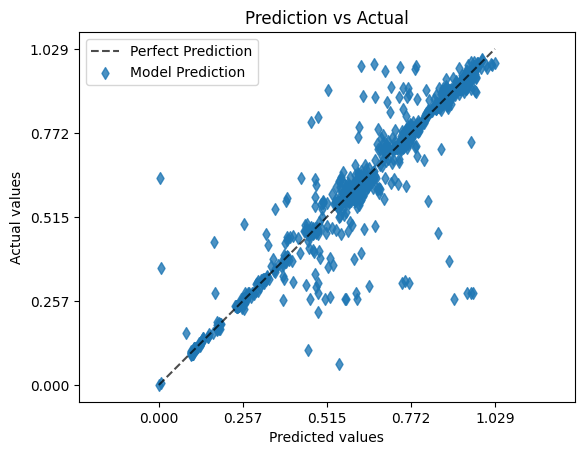

In [161]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import PredictionErrorDisplay

def plot_predictions(model, X_test_scaled, y_test_scaled):
    predicted = model.predict(X_test_scaled)
    
    data = pd.DataFrame({
        'Actual': y_test_scaled.flatten(), 
        'Predicted': predicted.flatten()
    })
    data.to_csv('predictions.csv', index=False)

    display = PredictionErrorDisplay(y_true=y_test_scaled, y_pred=predicted)
    display.plot(kind="actual_vs_predicted", scatter_kwargs={'marker': 'd'})
    plt.legend(["Perfect Prediction", "Model Prediction"])
    plt.title("Prediction vs Actual")
    plt.show()

plot_predictions(model, X_test_scaled, y_test_scaled)

In [162]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

mae = history.history['mae']
val_mae = history.history['val_mae']

mse = history.history['mse']
val_mse = history.history['val_mse']

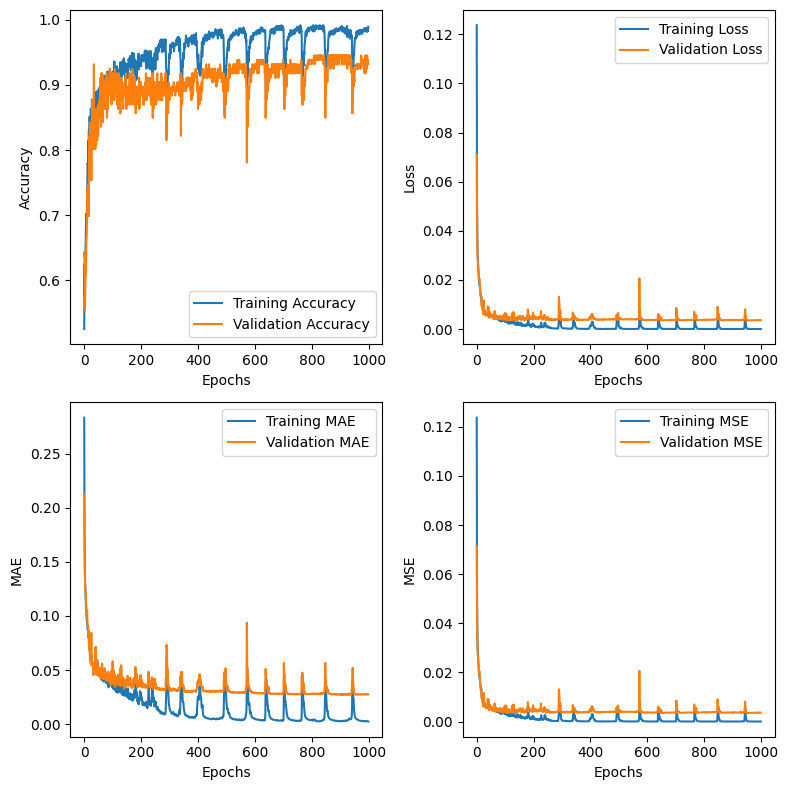

In [163]:
plt.figure(figsize=(8, 8))

plt.subplot(2, 2, 1)
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(mae, label='Training MAE')
plt.plot(val_mae, label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(mse, label='Training MSE')
plt.plot(val_mse, label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()

plt.tight_layout()
plt.show()

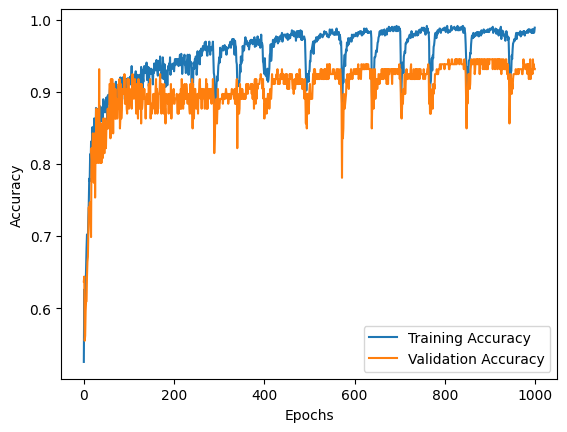

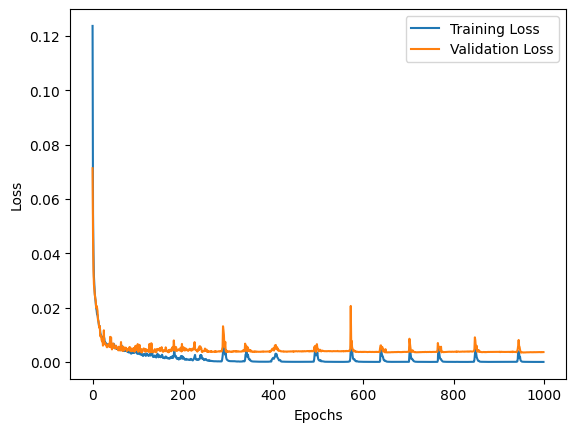

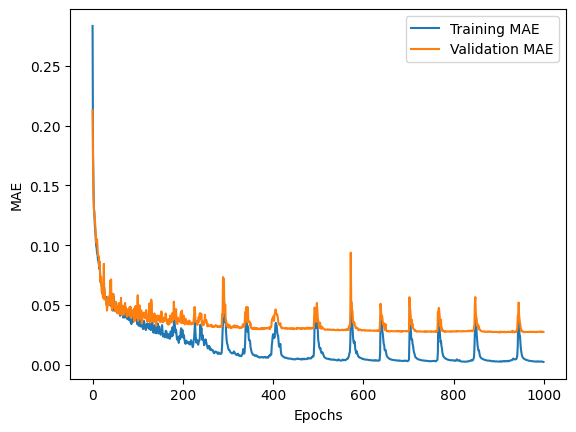

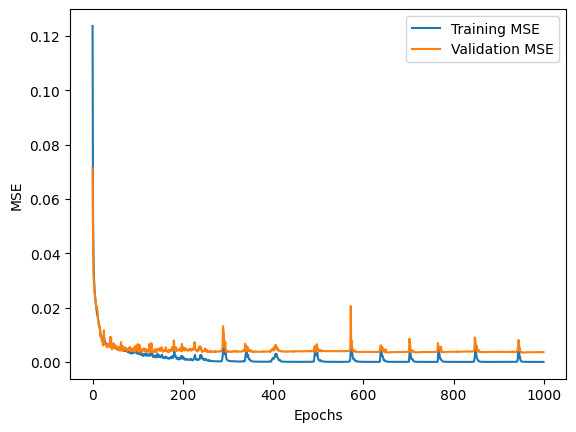

In [164]:
plt.plot(accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(mae, label='Training MAE')
plt.plot(val_mae, label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

plt.plot(mse, label='Training MSE')
plt.plot(val_mse, label='Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.legend()
plt.show()

## SK-LEARN

In [165]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import explained_variance_score

import matplotlib.pyplot as plt
from sklearn.metrics import PredictionErrorDisplay


def print_metrics(bar, model, x_test_scaled, y_test):
    predicted = model.predict(x_test_scaled)

    print(bar)

    display = PredictionErrorDisplay(y_true=y_test, y_pred=predicted)
    display.plot(kind="actual_vs_predicted",scatter_kwargs={'marker' : 'd'})

    plt.legend(["Perfect Prediction","Model Prediction"])
    plt.show()

    print(f"R2 Score: {r2_score(y_test, predicted)}")
    print(f"Mean Absolute Error: {mean_absolute_error(y_test, predicted)}")
    print(f"Mean Squared Error: {mean_squared_error(y_test, predicted)}")
    print(f"Explained Varaince Score: {explained_variance_score(y_test, predicted)}")

    print()

### DUMMY REGRESSOR

Ridge Linear


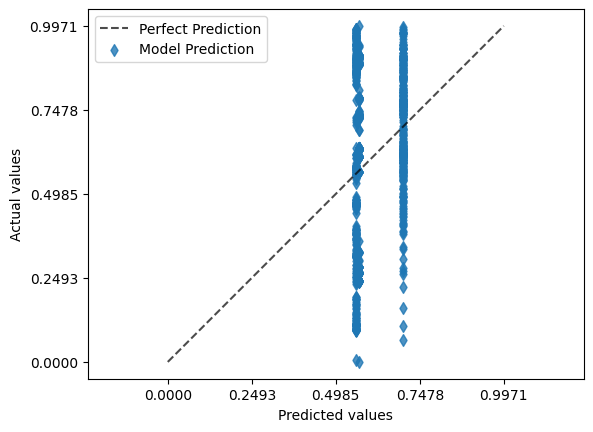

R2 Score: -0.0011005110193295458
Mean Absolute Error: 0.2101943466365301
Mean Squared Error: 0.061822011904785396
Explained Varaince Score: -5.921189464667501e-16



In [166]:
from sklearn.dummy import DummyRegressor

dummy_reg = DummyRegressor(strategy="mean")
dummy_reg.fit(X_train_scaled, y_train_scaled)

print_metrics("Ridge Linear", dummy_reg, x_test_scaled = X_test_scaled, y_test = y_test_scaled)

### LINEAR MODELS

In [167]:
from sklearn import linear_model

Basic

Linear


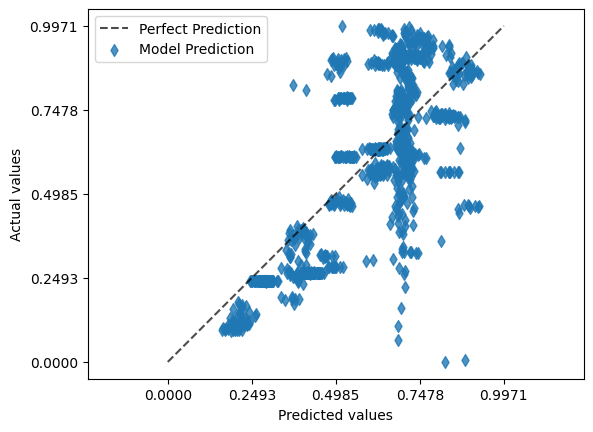

R2 Score: 0.40002688179407264
Mean Absolute Error: 0.13484685212482453
Mean Squared Error: 0.029586656193144784
Explained Varaince Score: 0.4009225003437536



In [168]:
linear = linear_model.LinearRegression()
linear.fit(X_train_scaled, y_train_scaled)

print_metrics("Linear", linear, x_test_scaled = X_test_scaled, y_test = y_test_scaled)

### RIDGE REGRESSION

Ridge Linear


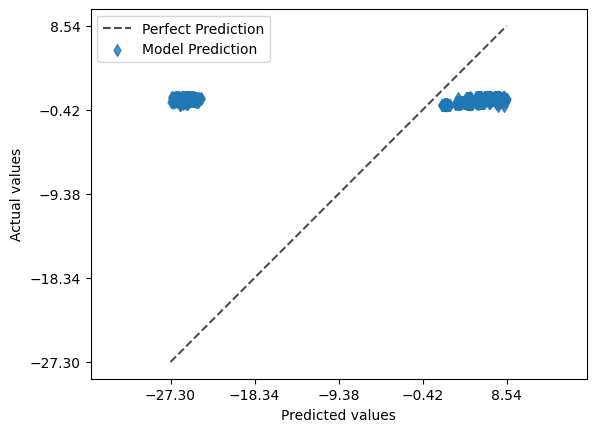

R2 Score: -8595.412779031538
Mean Absolute Error: 12.244061321255392
Mean Squared Error: 252.2769362786429
Explained Varaince Score: -19.691951561721933



In [169]:
ridge_reg = linear_model.Ridge(alpha=.5)
ridge_reg.fit(X_train_scaled, y_train)

print_metrics("Ridge Linear", ridge_reg, x_test_scaled = X_test_scaled, y_test = y_test_scaled)

Bayesian Ridge

Lasso Lars Bayesian Ridge


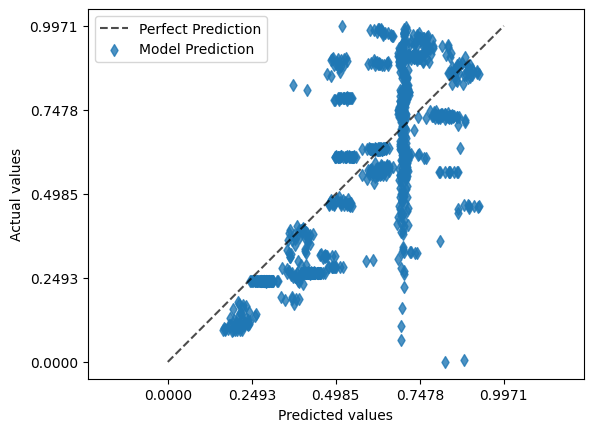

R2 Score: 0.4041861151127832
Mean Absolute Error: 0.13451251576284942
Mean Squared Error: 0.029483556881738746
Explained Varaince Score: 0.4050772376382941



In [170]:
from sklearn.multioutput import MultiOutputRegressor, RegressorChain

bayesian_redge_reg = MultiOutputRegressor(linear_model.BayesianRidge())
bayesian_redge_reg.fit(X_train_scaled, y_train_scaled)

print_metrics("Lasso Lars Bayesian Ridge", bayesian_redge_reg, x_test_scaled = X_test_scaled, y_test = y_test_scaled)

### HIST GRADIENT BOOSTING

Hist Regression


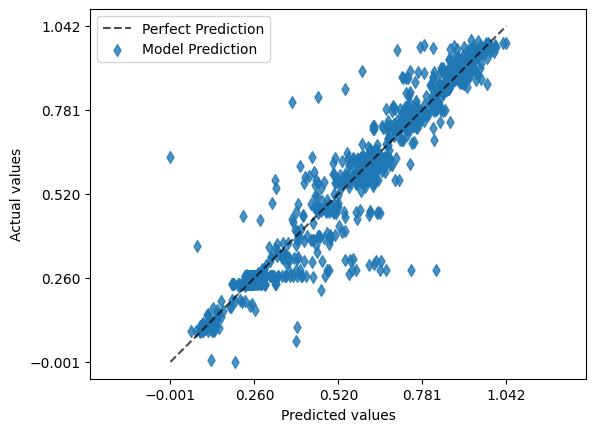

R2 Score: 0.8990893074255574
Mean Absolute Error: 0.04236245722930449
Mean Squared Error: 0.005732971172226962
Explained Varaince Score: 0.9004840370191983



In [171]:
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor, RegressorChain

hgbr_reg = MultiOutputRegressor(HistGradientBoostingRegressor(loss="squared_error", max_leaf_nodes=128))
hgbr_reg.fit(X_train_scaled, y_train_scaled)
print_metrics("Hist Regression", hgbr_reg, x_test_scaled = X_test_scaled, y_test = y_test_scaled)

Hist Regression


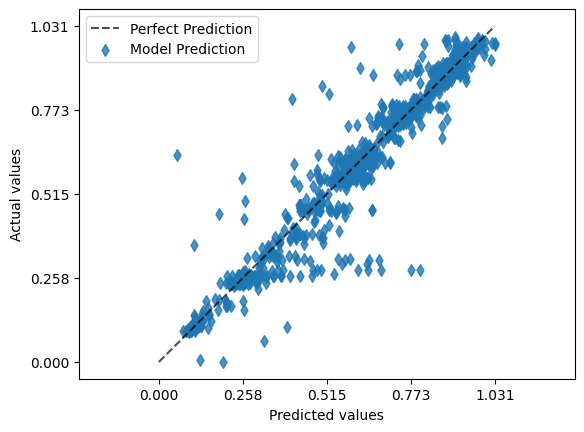

R2 Score: 0.9137046250750971
Mean Absolute Error: 0.03737458498041087
Mean Squared Error: 0.005107226138005677
Explained Varaince Score: 0.9146596449802216

Linear (Polynomial)


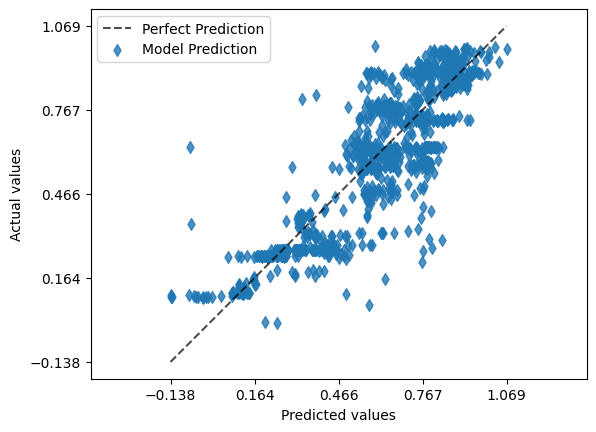

R2 Score: 0.6489532787471516
Mean Absolute Error: 0.09871784993636375
Mean Squared Error: 0.01746612448199684
Explained Varaince Score: 0.6513683601223965



In [172]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(4)

from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.multioutput import MultiOutputRegressor

hgbr_reg = MultiOutputRegressor(HistGradientBoostingRegressor(loss="squared_error", max_leaf_nodes=128))
hgbr_reg.fit(poly.fit_transform(X_train_scaled), y_train_scaled)
print_metrics("Hist Regression", hgbr_reg, x_test_scaled = poly.fit_transform(X_test_scaled), y_test = y_test_scaled)

linear_poly = linear_model.LinearRegression(fit_intercept=False)
linear_poly.fit(poly.fit_transform(X_train_scaled), y_train_scaled)
print_metrics("Linear (Polynomial)", linear_poly, x_test_scaled = poly.fit_transform(X_test_scaled), y_test = y_test_scaled)

### SVM

kernel = rbf

SVR


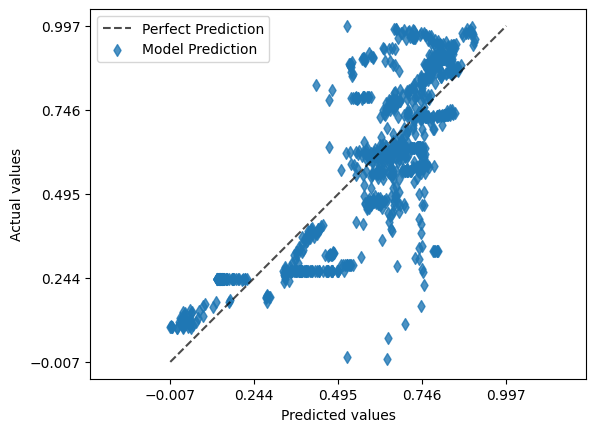

R2 Score: 0.5771788380810801
Mean Absolute Error: 0.11521362754613007
Mean Squared Error: 0.021471036689932776
Explained Varaince Score: 0.5820049543487684



In [173]:
from sklearn import svm
from sklearn.multioutput import MultiOutputRegressor

svr_reg = MultiOutputRegressor(svm.SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1))
svr_reg.fit(X_train_scaled, y_train_scaled)
print_metrics("SVR", svr_reg, x_test_scaled = X_test_scaled, y_test = y_test_scaled)

kernel = linear

SVR


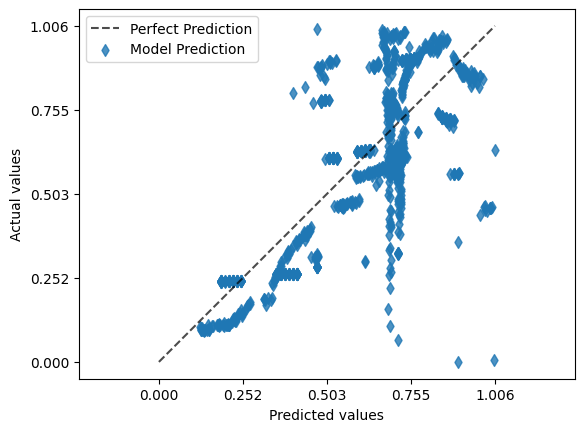

R2 Score: 0.40504815421631785
Mean Absolute Error: 0.13283815197800053
Mean Squared Error: 0.02932334847136908
Explained Varaince Score: 0.40759402615957924



In [174]:
from sklearn import svm
from sklearn.multioutput import MultiOutputRegressor

svr_reg = MultiOutputRegressor(svm.SVR(kernel="linear", C=100, gamma="auto"))
svr_reg.fit(X_train_scaled, y_train_scaled)
print_metrics("SVR", svr_reg, x_test_scaled = X_test_scaled, y_test = y_test_scaled)

kernel = poly

SVR


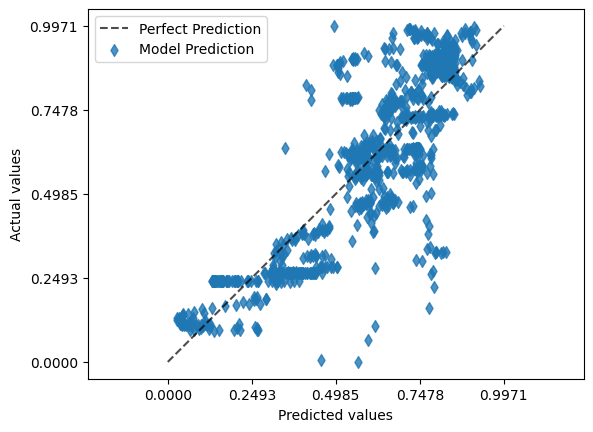

R2 Score: 0.6082169936497339
Mean Absolute Error: 0.10596837661970428
Mean Squared Error: 0.019761079500704246
Explained Varaince Score: 0.6118666121801875



In [175]:
from sklearn import svm
from sklearn.multioutput import MultiOutputRegressor

svr_reg = MultiOutputRegressor(svm.SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1))
svr_reg.fit(X_train_scaled, y_train_scaled)
print_metrics("SVR", svr_reg, x_test_scaled = X_test_scaled, y_test = y_test_scaled)

## KNN

SVM

KNNR


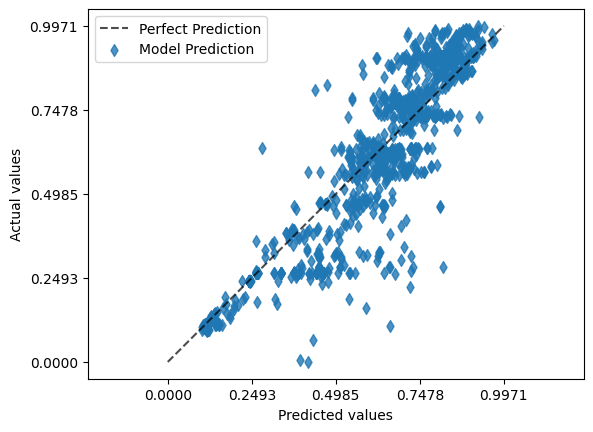

R2 Score: 0.7457634911370062
Mean Absolute Error: 0.08189406261019186
Mean Squared Error: 0.013316757601992473
Explained Varaince Score: 0.7495312941695117



In [176]:
from sklearn import neighbors

n_neighbors = 5

weights = ["uniform", "distance"]
knn_reg = neighbors.KNeighborsRegressor(n_neighbors, weights=weights[1])
knn_reg.fit(X_train_scaled, y_train_scaled)
print_metrics("KNNR", knn_reg, x_test_scaled = X_test_scaled, y_test = y_test_scaled)

### DECISION TREE

Decision Tree Regressor


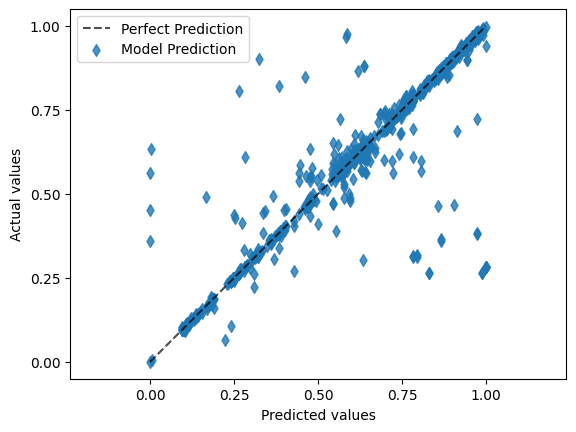

R2 Score: 0.845680294639453
Mean Absolute Error: 0.028642428624399602
Mean Squared Error: 0.0101688721947117
Explained Varaince Score: 0.8464378960992862



In [177]:
from sklearn import tree

clf = tree.DecisionTreeRegressor()
clf.fit(X_train_scaled, y_train_scaled)
print_metrics("Decision Tree Regressor", clf, x_test_scaled = X_test_scaled, y_test = y_test_scaled)

### RANDOM FOREST

Random Forest Regressor


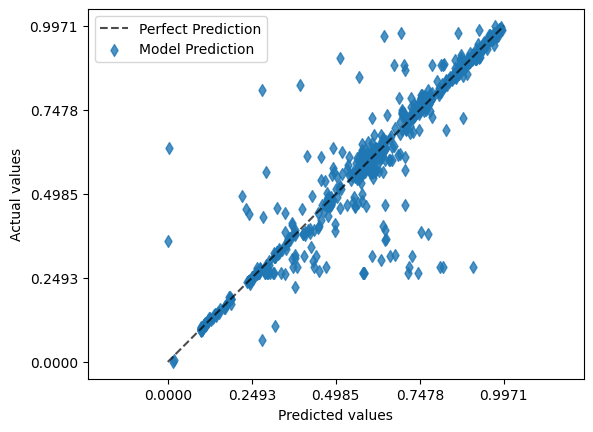

R2 Score: 0.9047481976984267
Mean Absolute Error: 0.02739466141017538
Mean Squared Error: 0.006051255652797234
Explained Varaince Score: 0.9055822432417115



In [178]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train_scaled, y_train_scaled)
print_metrics("Random Forest Regressor", rf_reg, x_test_scaled = X_test_scaled, y_test = y_test_scaled)